# Many Endings with different Image creation values

## Step 1.1
### Load nessecary modules

In [1]:
# Add python modules
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as SIMR
gm = SIMR.gm
im = SIMR.im
SIM = SIMR.SIM
IMG = SIMR.IMG
ms = SIMR.ms
sa = SIMR.sa
dc = SIMR.ms.dc

SIMR.test()
gm.test()
SIM.test()
IMG.test()
ms.test()
dc.test()
sa.test()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-u8it5sqh because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
SIM: Hi!  You're in Matthew's main code for all things simulation.
IMG: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 1.2
### Load Sample Target and Run Info class
Needed for loading the target image and running through models later.

In [2]:
tDir = '../targetDir/'
#tDir = '../dataDir/588013383816904792/'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!: %s" % tInfo.get('target_id'))
    
# Get run info class
rInfo = tInfo.getRunInfo( )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!: 587722984435351614
Run 'run_0000' Good!


___
## Step 2
### Load a starting Image parameter set

In [4]:
# Get memory usage
def getMemUsage():
    import psutil
    mem = psutil.virtual_memory()
    memUsed = mem.used / 1024**3
    memTotal = mem.total / 1024**3
    memPercent = mem.percent
    # return memPercent
    return memUsed, memTotal, memPercent
    # print( 'memUsed: ', memUsed )
    # print( 'memTotal: ', memTotal )
    # print( 'memPercent: ', memPercent )

getMemUsage()

(0.8650665283203125, 62.67174530029297, 4.6)

In [5]:
sParam = tInfo.readScoreParam( 'dl-s2-1' )
for key in sParam:
    print( key )

dl-s2-1-base-0
dl-s2-1-base-1
dl-s2-1-base-2
dl-s2-1-base-3
dl-s2-1-base-4
dl-s2-1-base-5
dl-s2-1-base-6
dl-s2-1-base-7
dl-s2-1-base-8
dl-s2-1-base-9
dl-s2-1-base-10
dl-s2-1-base-11
dl-s2-1-base-12
dl-s2-1-base-13
dl-s2-1-base-14
dl-s2-1-base-15
dl-s2-1-base-16
dl-s2-1-base-17
dl-s2-1-base-18
dl-s2-1-base-19
dl-s2-1-base-20
dl-s2-1-base-21
dl-s2-1-base-22
dl-s2-1-base-23
dl-s2-1-base-24
dl-s2-1-base-25
dl-s2-1-base-26
dl-s2-1-many-0
dl-s2-1-many-1
dl-s2-1-many-2
dl-s2-1-many-3
dl-s2-1-many-4
dl-s2-1-many-5
dl-s2-1-many-6
dl-s2-1-many-7
dl-s2-1-many-8
dl-s2-1-many-9
dl-s2-1-many-10
dl-s2-1-many-11
dl-s2-1-many-12
dl-s2-1-many-13
dl-s2-1-many-14
dl-s2-1-many-15
dl-s2-1-many-16
dl-s2-1-many-17
dl-s2-1-many-18
dl-s2-1-many-19
dl-s2-1-many-20
dl-s2-1-many-21
dl-s2-1-many-22
dl-s2-1-many-23
dl-s2-1-many-24
dl-s2-1-many-25
dl-s2-1-many-26


In [6]:
getMemUsage()

(0.8663787841796875, 62.67174530029297, 4.6)

In [16]:
# Find out the ratio of scores I need
rDicts = tInfo.get('zoo_merger_models')
n = len( rDicts.keys() ) 
scores = np.zeros(n)

for i, rid in enumerate(rDicts):
    scores[i] = rDicts[rid]['zoo_merger_score']
    print( i, rid, end='\r' ) 
    
print("\nDONE\n")
    

1292 run_1292
DONE



(array([723., 248., 106.,  56.,  34.,  27.,  32.,  26.,  16.,  25.]),
 array([0.        , 0.09459459, 0.18918919, 0.28378378, 0.37837838,
        0.47297297, 0.56756757, 0.66216216, 0.75675676, 0.85135135,
        0.94594595]),
 <BarContainer object of 10 artists>)

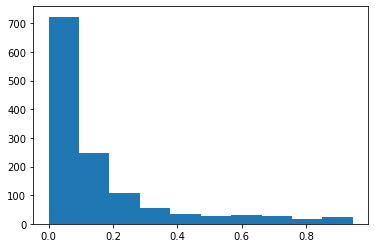

In [17]:
#plt.scatter( range(n), scores, )
plt.hist( scores )

In [18]:
# Find out the ratio of scores I need
rDicts = tInfo.get('zoo_merger_models')
n = len( rDicts.keys() ) 
scores = np.zeros(n)

for i, rid in enumerate(rDicts):
    scores[i] = rDicts[rid]['zoo_merger_score']
    print( i, rid, end='\r' ) 
    
print("\nDONE\n")

# Create numpy histogram of scores
tmp = np.histogram( scores, bins=5, range=(0,1) )
sHist = tmp[0]
sBins = tmp[1]

max = np.amin( sHist ) * 11

sHist = sHist * 11

r1 = max / sHist

cutoff = 1/11.

r2 = np.ones( len(sHist) )
for i, v in enumerate(r1):
    if v < cutoff:
        r2[i] = r1[i] / cutoff
        r1[i] = cutoff

timeRatio = r1
visRatio = r2
print( 'timeRatio: ', timeRatio )
print( 'visRatio: ', visRatio )


1292 run_1292
DONE

timeRatio:  [0.09090909 0.2        0.5        0.57142857 1.        ]
visRatio:  [0.35881753 1.         1.         1.         1.        ]


In [19]:
def getBinIndex( value ):
    # Get index of bin value would fall into
    binIndex = np.digitize( value, sBins ) - 1
    return binIndex

for f in np.linspace( 0.1, 0.9, 15 ):
    print( '%.2f' % f, getBinIndex(f) )

0.10 0
0.16 0
0.21 1
0.27 1
0.33 1
0.39 1
0.44 2
0.50 2
0.56 2
0.61 3
0.67 3
0.73 3
0.79 3
0.84 4
0.90 4


In [20]:
sParam = tInfo.readScoreParam( 'dl-s2-1' )
for key in sParam:
    #print( key )
    pass
    
def getManyImages( rInfo, sParam):
    imgList = []
    initList = []
    
    for key in sParam:
        if 'base' in key:
            # print( sParam[key]['imgArg'].get("type",'model' ) )
            tmpImg = rInfo.getModelImage( key, imgType = 'init' )
            if type( tmpImg ) != type( None ):
                initList.append( tmpImg )
                
        elif 'many' in key:
            tmpImg = rInfo.getModelImage( key, imgType = 'many_endings' )
            if type( tmpImg ) != type( None ):
                imgList.append( tmpImg )
        
    # Expand init array
    imgList = np.array(imgList)
    initList = np.array(initList)

    newInitAr = np.zeros( imgList.shape )
    for i in range( len(initList) ):
        for j in range( imgList.shape[1] ):
            newInitAr[i,j,:,:] = initList[i,:,:]
                
    
    return ( imgList , newInitAr  )
    

imgList, initList = getManyImages( tInfo.getRunInfo(), sParam,  )
print( "return", len(imgList), len(initList ) )

print( imgList.shape )
print( initList.shape )



return 27 27
(27, 11, 128, 128)
(27, 11, 128, 128)


In [13]:
def getImageAndInfo( rInfo, sParam, printAll=False  ):
    if printAll:  print( rInfo.rDict )

    # Get imags
    rimgList, rinitList = getManyImages( rInfo, sParam )
    
    # Get bin based on score
    score = rInfo.rDict.get("zoo_merger_score")
    if printAll:  print( 'score: ', score )
    bi = getBinIndex( score )
    if printAll:  print( 'binIndex: ', bi )

    # Get 11 random values between 0 and 1
    randTimeVals = np.random.rand( 11 )
    randVisVals = np.random.rand( 27 )

    # boolean if it's above or below the cutoff ratio
    randTimeBool = randTimeVals < timeRatio[bi]
    randVisBool = randVisVals < visRatio[bi]

    # Verify at least one is true
    if np.sum( randTimeBool ) == 0:
        randTimeBool[5] = True
    if np.sum( randVisBool ) == 0:
        randVisBool[ np.random.randint(0,27) ] = True

    # Print the values and booleans
    if printAll:  
        print( 'randTimeBool: ', randTimeBool )
        print( 'randVisBool: ', randVisBool )

        print( 'rimgList.shape: ', rimgList.shape )
        print( 'rinitList.shape: ', rinitList.shape )

    # Extract Visual chosen images
    rimgList = rimgList[ randVisBool ]
    rinitList = rinitList[ randVisBool ]

    # Extract time chose images
    rimgList = rimgList[ :, randTimeBool ]
    rinitList = rinitList[ :, randTimeBool ]

    if printAll:  
        print( 'New rimgList.shape: ', rimgList.shape )
        print( 'New rinitList.shape: ', rinitList.shape )

    # Reshape 
    rimgList = rimgList.reshape( ( -1, 128, 128 ) )
    rinitList = rinitList.reshape( ( -1, 128, 128 ) )

    if printAll:  
        print( 'Final rimgList.shape: ', rimgList.shape )
        print( 'Final rinitList.shape: ', rinitList.shape )

        
    # Get info for images
    iDict = { 'score' : score,
                'model_data' : rInfo.rDict.get("model_data"),
                'run_id' : rInfo.get('run_id'),
    }

    rinfoList = []
    for i in range( len( rimgList ) ):
        rinfoList.append( iDict )

    return ( rimgList, rinitList, rinfoList )

rimgList, rinitList, rinfoList = getImageAndInfo( tInfo.getRunInfo(), sParam, printAll=True )

rimgList2, rinitList2, rinfoList2 = getImageAndInfo( tInfo.getRunInfo('run_1000'), sParam, printAll=True )

# Plot x random images from list
for i,j in enumerate(range(0, 20, 5)):
    plt.subplot(2,2,i+1)
    plt.imshow( rimgList[j,:,:], cmap='gray' )

{'run_id': 'run_0000', 'model_data': '-9.93853,-4.5805,3.27377,-0.50008,-2.45565,-1.07799,23.33004,24.69427,3.49825,5.32056,309.6923,36.8125,41.78471,51.42857,0.3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.94594,0,0,0.18901,-22.47999,9.02372,0.0,1.0,0.0,0.0,0.0,0.0', 'zoo_merger_score': '0.9459459459459459', 'machine_scores': {}, 'human_scores': {'zoo_merger_wins_losses': '35/37', 'zoo_merger_score': '0.9459459459459459'}}


NameError: name 'getManyImages' is not defined

In [ ]:
# Modifying info real quick. 

In [14]:

rDicts = tInfo.get('zoo_merger_models')

n = len( rDicts.keys() )
print( 'N: ', n )

imgList = []
initList = []
infoList = []

printAll = False

for i, rId in enumerate(rDicts):
    
    if rId == None:
        print("ERROR: rid: ", rId )
        continue
    
    rInfo = tInfo.getRunInfo( rId )
    if type( rInfo ) == type( None ):
        print("ERROR: rid: ", rId )
        continue

    if rInfo.status == False:
        print("ERROR: rid: ", rId )
        continue
        
    rimgList, rinitList, rinfoList = getImageAndInfo( rInfo, sParam, printAll=printAll )


    # Add to list
    imgList.extend( rimgList )
    initList.extend( rinitList )
    infoList.extend( rinfoList )
    
    print( 'RID:  ', rId, n, getMemUsage(), end='\r' )
    
    # if i > 0: break

print( '\n\nDone' )
print( 'imgList: ', len(imgList) )
print( 'initList: ', len(initList) )
print( 'infoList: ', len(infoList) )



N:  1293
RID:   run_1292 1293 (14.105304718017578, 62.67174530029297, 25.9)

Done
imgList:  52814
initList:  52814
infoList:  52814


[46802  4930  1697 22639 14856 46991 21783  9920 11556 21211]


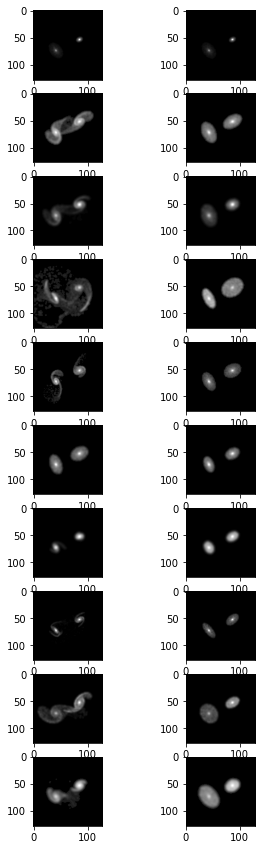

In [15]:
# Plot X random images from image list
x = 10
n = len( imgList )
randVals = np.random.randint( 0, n, x )
print( randVals )

plt.rcParams['figure.figsize'] = [5, 15]

# Plot 8 random images
for i,j in enumerate(randVals):
    plt.subplot(x,2,2*i+1)
    plt.imshow( imgList[j], cmap='gray' )
    plt.subplot(x,2,2*i+2)
    plt.imshow( initList[j], cmap='gray' )



In [37]:
scores = [ d['score'] for d in infoList ]
scores = np.array( scores ).astype( np.float )

/tmp/ipykernel_599304/3786355309.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  scores = np.array( scores ).astype( np.float )


0.9459459459459459 <class 'numpy.float64'>


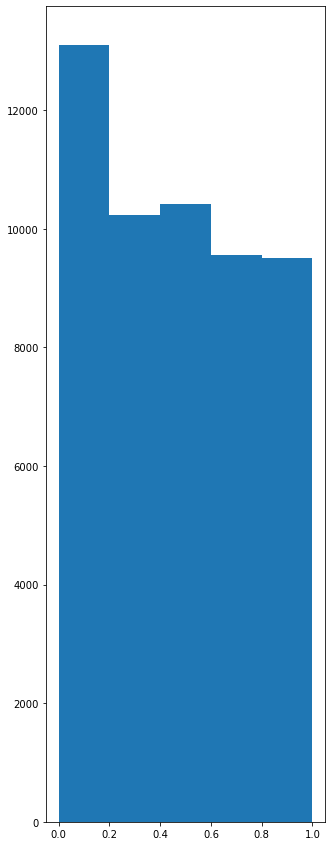

In [39]:

# plt.hist( scores, bins=5, )
plt.hist( scores, bins=5, range=(0,1) )

print( scores[0], type( scores[0] ) )

In [41]:
imgList = np.array( imgList )
initList = np.array( initList )

In [49]:
# np.savez_compressed( imgLoc, img )

print( os.getcwd() )

dataLoc = "/home/mbo2d/galStuff/data-dir/"

imgLoc = dataLoc + 'img'
initLoc = dataLoc + 'init'

np.savez_compressed( imgLoc, imgList )
np.savez_compressed( initLoc, initList )

/home/mbo2d/galStuff/galaxyJSPAM/Notebooks


In [44]:
print( 'done' )

done


In [47]:
infoDict = { 'info' : infoList } 

gm.saveJson( infoDict, dataLoc + 'info.json' )

In [2]:
dataLoc = "/home/mbo2d/galStuff/data-dir/"


In [23]:
dataLoc = "/home/mbo2d/galStuff/data-dir/"
infoDict = dataLoc + 'info.json'
imgData = np.load( dataLoc + 'img.npz' )['arr_0']
iniData = np.load( dataLoc + 'init.npz' )['arr_0']

print( type( infoDict ), type( imgData ), type( iniData ) )

<class 'str'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [24]:
print( 'img: ', imgData.shape )
print( 'ini: ', iniData.shape )

img:  (52814, 128, 128)
ini:  (52814, 128, 128)


In [25]:
tImg = tInfo.getTargetImage( 'dl-s2-0' )
print( type( tImg ) )

<class 'numpy.ndarray'>


In [26]:
print( tImg.shape )

(128, 128)


In [27]:
data = np.zeros( ( imgData.shape[0], 128, 128, 3 ) )
print( 'data: ', data.shape )

data:  (52814, 128, 128, 3)


In [28]:
for i in range( imgData.shape[0] ):
    # Load target image
    data[i,:,:,0] = tImg[:,:]
    
    # Load Model Image
    data[i,:,:,1] = imgData[i,:,:]
    
    # Load Init Image
    data[i,:,:,2] = iniData[i,:,:]
    
    print( i, imgData.shape[0], end='\r' )
    
print('\nDone')

52813 52814
Done


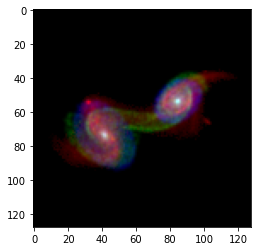

In [34]:
plt.imshow( data[0] )

In [35]:
print( np.amax( data ), np.amin( data ) )

1.0 0.0


In [36]:
data *= 255
print( np.amax( data ), np.amin( data ) )


255.0 0.0


In [37]:
data = data.astype( np.uint8 )
print( np.amax( data ), np.amin( data ) )


255 0


In [38]:
np.savez_compressed( dataLoc + 'dl-s2-2', data )
print("Saved")

Saved


In [39]:
# Save smaller file for dev work
data3 = data[::50]
print( data3.shape )
np.savez_compressed( dataLoc + 'dl-s2-3', data3 )
print( 'done' )


(1057, 128, 128, 3)
done


In [4]:
import json
dataLoc = "/home/mbo2d/galStuff/data-dir/"

with open( dataLoc + 'info.json' ) as keyFile:
    info = json.load( keyFile )

print( info.keys() )

dict_keys(['info'])


In [8]:
# Fix string scores to float scores

for i, ii in enumerate( info['info'] ):
    info['info'][i]['score'] = float ( info['info'][i]['score'] )

print( 'done' )

done


In [9]:
with open( dataLoc + 'dl-s2-2.json', 'w' ) as keyFile:
    json.dump( info, keyFile )

In [10]:

info3List = [ ii for i, ii in enumerate(info['info']) if i % 50 == 0  ]
info3 = { 'info' : info3List }

print( type( info3 ) )

<class 'dict'>


In [11]:
print( type( info3['info'] ) )
print( len( info3['info'] ) )

<class 'list'>
1057


In [12]:

with open( dataLoc + 'dl-s2-3.json', 'w' ) as keyFile:
    json.dump( info3, keyFile )

In [13]:
print('yay')

yay
